# Problem set 2: Probability and modelling recovery

In [320]:
using Plots
using Statistics
using Interact, Mux, WebIO

## Exercise 1: Frequencies

In [255]:
function counts(data)
    counts = Dict{Int, Int}()
    for item in data
        if haskey(counts, item)
            counts[item] += 1
        else
            counts[item] = 1
        end
    end
    
    ks = collect(keys(counts))
    vs = collect(values(counts))
    
    p = sortperm(ks)
    
    return ks[p], vs[p]
end

counts (generic function with 1 method)

In [256]:
vv = [1, 0, 1, 0, 1000, 1, 1, 1000]
result = counts(vv)

([0, 1, 1000], [2, 4, 2])

In [257]:
function probability_distribution(data)
    ks, vs = counts(data)
    return ks, vs/sum(vs)
end

probability_distribution (generic function with 2 methods)

In [258]:
result = probability_distribution(vv)

([0, 1, 1000], [0.25, 0.5, 0.25])

## Exercise 2: Modelling recovery

In [259]:
function bernoulli(p)
    r = rand()
    if r < p
        return true
    else
        return false
    end
end

bernoulli (generic function with 1 method)

In [260]:
bernoulli(.0001)

false

In [261]:
function geometric(p)
    t = 1
    while !bernoulli(p)
        t += 1
    end
    return t
end

geometric (generic function with 1 method)

In [262]:
geometric(.5)

3

In [263]:
function experiment(p, N)
    results = []
    for i in 1:N
        push!(results, geometric(p))
    end
    return results
end

experiment (generic function with 1 method)

In [264]:
result = experiment(.25,100000);

In [265]:
ks, vs = probability_distribution(result)

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  25, 26, 27, 28, 29, 30, 31, 32, 35, 39], [0.24943, 0.18749, 0.14067, 0.10627, 0.07719, 0.05932, 0.04421, 0.03297, 0.02492, 0.01966  …  0.00024, 0.00016, 0.0001, 0.0001, 8.0e-5, 7.0e-5, 3.0e-5, 4.0e-5, 1.0e-5, 1.0e-5])

In [266]:
mean_value = mean(result)

4.01488

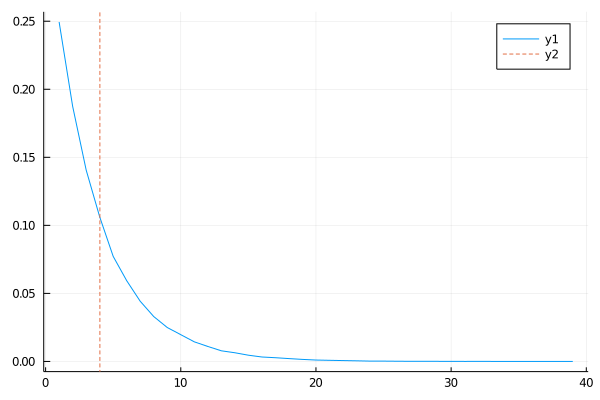

In [267]:
p = plot(ks, vs, )
vline!([mean_value], ls=:dash)

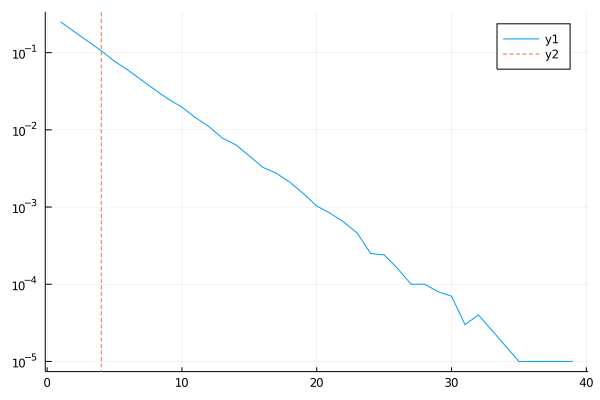

In [268]:
plot!(p, yscale=:log)

## Exercise 3: More efficient geometric distributions

In [269]:
p = 0.25

0.25

In [270]:
Ps = []
for n in 1:50
    push!(Ps,p*(1-p)^(n-1))
end

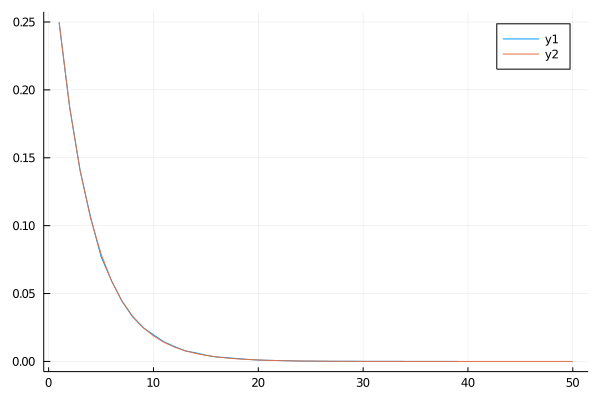

In [271]:
p = plot(ks,vs)
plot!(p, Ps)

The error is determined by the variance of the sampling distribution which is dependent on the number of trials in the experiment and p, for any given period t. 

In [280]:
function cumulative_sum(probability_distribution)
    cumulative_distribution = [probability_distribution[1]]
    for i in 1:length(probability_distribution)-1
        push!(cumulative_distribution, probability_distribution[i+1] + cumulative_distribution[i])
    end
    return cumulative_distribution
end

cumulative_sum (generic function with 1 method)

In [283]:
cumulative_distribution = cumulative_sum(Ps);

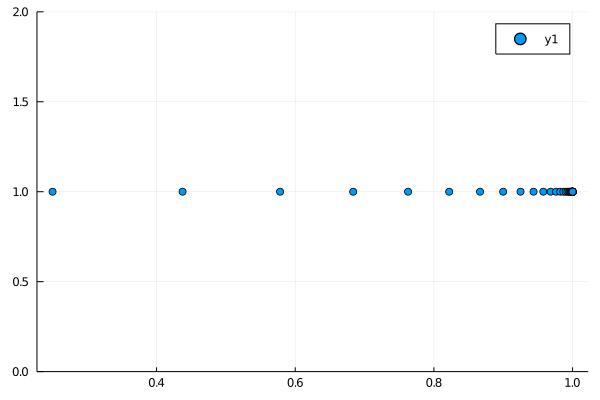

In [286]:
scatter(cumulative_distribution, [1 for i in 1:50], ylims = (0, 2))

Need to calculate the probability that P_1 up to P_n is not a hit then take the residual

In [288]:
function sum_P_range(p, n)
    P_1_n = 1 - (1-p)^n
    return P_1_n
end

sum_P_range (generic function with 1 method)

In [290]:
r = rand()

0.2317399405121523

In [297]:
function find_bin(r, p)
    (floor(log(1-r) / log(1-p))) + 1
end

find_bin (generic function with 1 method)

In [299]:
find_bin(.2317399405, .25)

1.0

## Exercise 4: A simple infection model

In [323]:
function total_time(p_E, p_I, p_R)
    n = geometric(p_E) + geometric(p_I) + geometric(p_R)
    return n
end

total_time (generic function with 1 method)

In [304]:
p_E = 0.25
p_I = 0.10
p_R = 0.05

0.05

In [305]:
function monte_carlo(p_E, p_I, p_R, N)
    results = []
    for i in 1:N
        push!(results, total_time(p_E, p_I, p_R))
    end
    return results
end

monte_carlo (generic function with 1 method)

In [314]:
result = monte_carlo(p_E, p_I, p_R, 10000)
ks, vs = probability_distribution(result)

([3, 4, 5, 6, 7, 8, 9, 10, 11, 12  …  145, 150, 156, 157, 159, 161, 164, 167, 172, 195], [0.0007, 0.0035, 0.0068, 0.0066, 0.0105, 0.0149, 0.0141, 0.0203, 0.0177, 0.0201  …  0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0002, 0.0001, 0.0001, 0.0002, 0.0001])

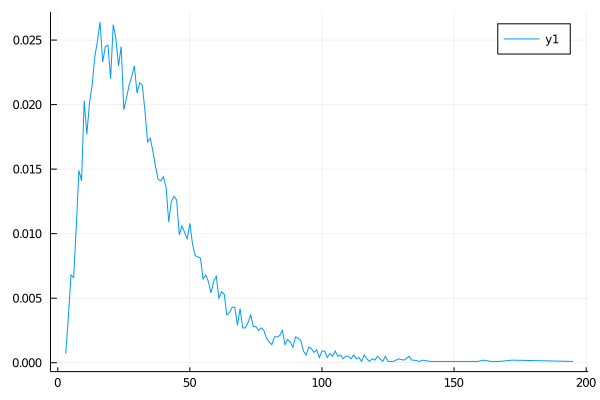

In [315]:
p = plot(ks,vs)

In [324]:
# Haven't finished this one
# function app(req)
#     @manipulate for n in slider(0:1:50, value=5)
#         ps = repeat([p], n);
#         total_time_vals = [total_time(ps) for _ in 1:N_runs];
#         ks, vals = probability_distribution(total_time_vals)
#         bar(ks, vals, label="Total Time", lc=:white, lw = 0.2)
#         #xlims!(0, 200)
#         #ylims!(0, 0.03)
#     end
# end
# webio_serve(page("/", app), 9000)

IOError: listen: address already in use (EADDRINUSE)
Stacktrace:
 [1] uv_error at 

Task (runnable) @0x00000001187b3a90

./libuv.jl:97 [inlined]
 [2] listen(::Sockets.TCPServer; backlog::Int64) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Sockets/src/Sockets.jl:622
 [3] #listen#10 at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Sockets/src/Sockets.jl:615 [inlined]
 [4] listen at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Sockets/src/Sockets.jl:613 [inlined]
 [5] serve(::WebSockets.ServerWS, ::Sockets.IPv4, ::Int64, ::Bool) at /Users/ericdodge/.julia/packages/WebSockets/vfjsy/src/HTTP.jl:353
 [6] serve at /Users/ericdodge/.julia/packages/WebSockets/vfjsy/src/HTTP.jl:401 [inlined]
 [7] (::Mux.var"#15#16"{Mux.App,Mux.App,Sockets.IPv4,Int64})() at ./task.jl:356
